In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal

### Loading cleaned datasets

In [19]:
benin = pd.read_csv("../data/benin_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

# strip whitespace from column names
benin.columns = benin.columns.str.strip()
sierra_leone.columns = sierra_leone.columns.str.strip()
togo.columns = togo.columns.str.strip()

# Adding a 'Country' column to each for identification
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine into one DataFrame
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

### Metric comparison

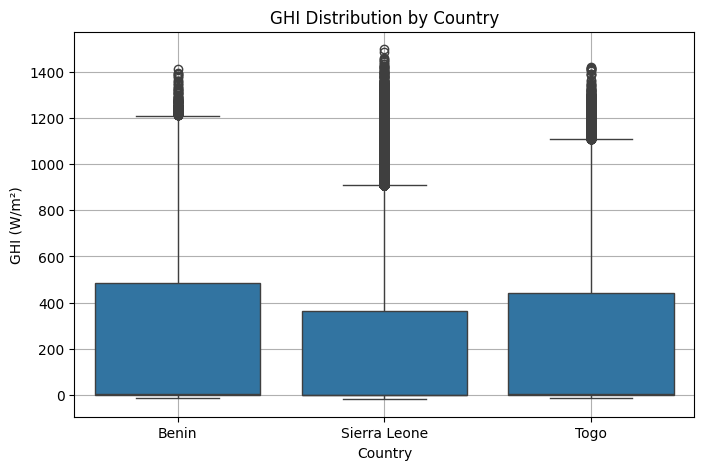

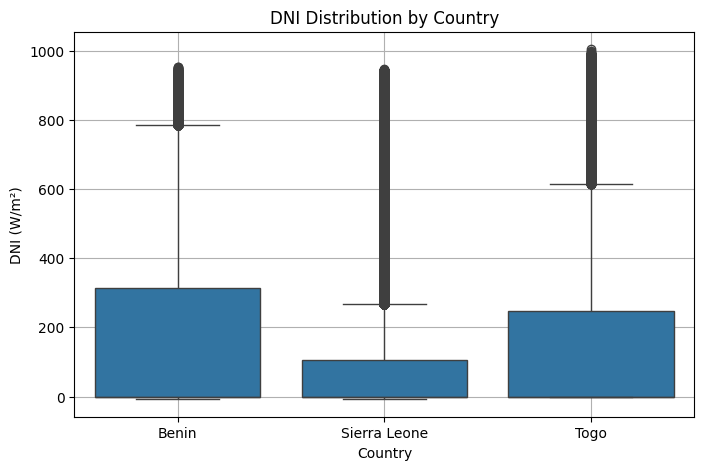

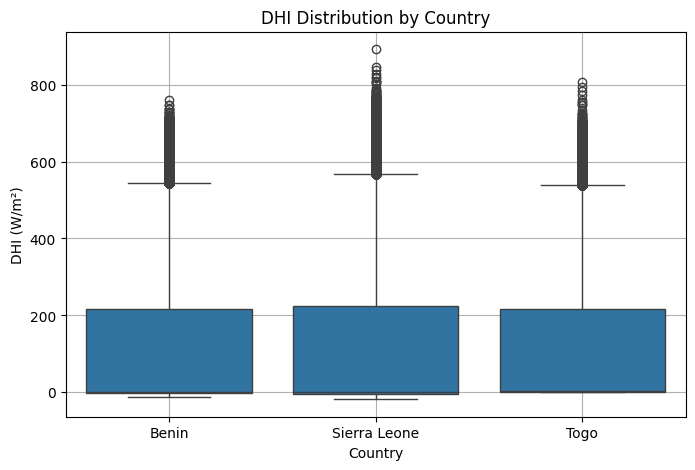

In [20]:
for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df)
    plt.title(f"{metric} Distribution by Country")
    plt.ylabel(f"{metric} (W/m²)")
    plt.xlabel("Country")
    plt.grid(True)
    plt.show()

In [21]:
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

### Statistical Testing

In [22]:
# Using one-way ANOVA
f_stat, p_val = f_oneway(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 2090.09, p-value: 0.0000


In [23]:
## Using Kruskal-Wallis test

kw_stat, kw_pval = kruskal(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print(f"Kruskal-Wallis statistic: {kw_stat:.2f}, p-value: {kw_pval:.4f}")

Kruskal-Wallis statistic: 4524.88, p-value: 0.0000


### Visual Ranking

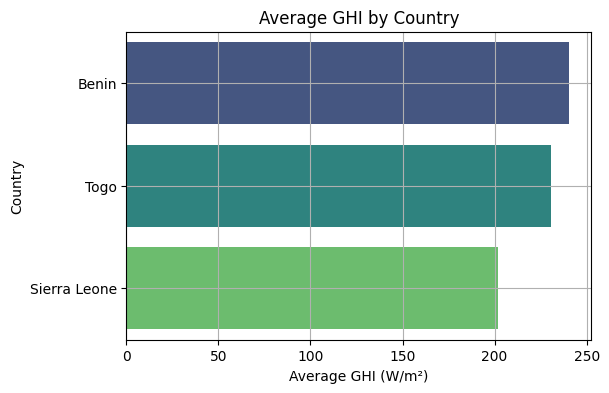

In [24]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, hue=avg_ghi.index, palette="viridis", legend=False)
plt.title("Average GHI by Country")
plt.xlabel("Average GHI (W/m²)")
plt.grid(True)
plt.show()

### Key Observations

- Benin shows the highest average and median GHI among the three countries, indicating strong solar potential.
- Sierra Leone exhibits the greatest variability in GHI values, as seen in the wider spread of its boxplot.
- Togo consistently has the lowest GHI, DNI, and DHI metrics, suggesting less favorable solar conditions compared to Benin and Sierra Leone.